<a href="https://colab.research.google.com/github/kheireldine/Machine-learning-Projects/blob/main/CV_MNIST_CONVENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST CONVENT

Firslty, let's understand what is MNIST:
[MNIST](https://www.kaggle.com/c/digit-recognizer) ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In [1]:
#As usual we will import the required Libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Data Preperation

Our dataset here will be imported from keras datasets.
Note that we need to  rescale (standardize) numbers from the range [0,255] to [0,1] which is better for nural network to handle in memory. 
We don't need to split data because it is imported ready from keras.
Also, we have to say that our data will be all with the same dimenssions and here they are (28,28,1). 1 means that the images are in gray scale and we don't have colors(RGB 3 instead of 1)

In [103]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model Buidling


We Will ise convoluational, Max Pooling, and dense layers.
Note that the input shape is (28,28,1) and of  course we have 10 classes because we have 10 numbers (0,9).

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Training and Compiling the model
Here we will use batches of size 128. and we will train only for 15 epochs 

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 42s 97ms/step - loss: 0.3629 - accuracy: 0.8895 - val_loss: 0.0844 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 41s 96ms/step - loss: 0.1116 - accuracy: 0.9663 - val_loss: 0.0607 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0853 - accuracy: 0.9737 - val_loss: 0.0490 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0684 - accuracy: 0.9784 - val_loss: 0.0413 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0404 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 41s 96ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0392 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0352 - val_accuracy:

# Model Evaluation


In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023386402055621147
Test accuracy: 0.9915000200271606


# Predict

In [65]:
predictions = model.predict(x_test)

predictions[3].round(),y_test[3]


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


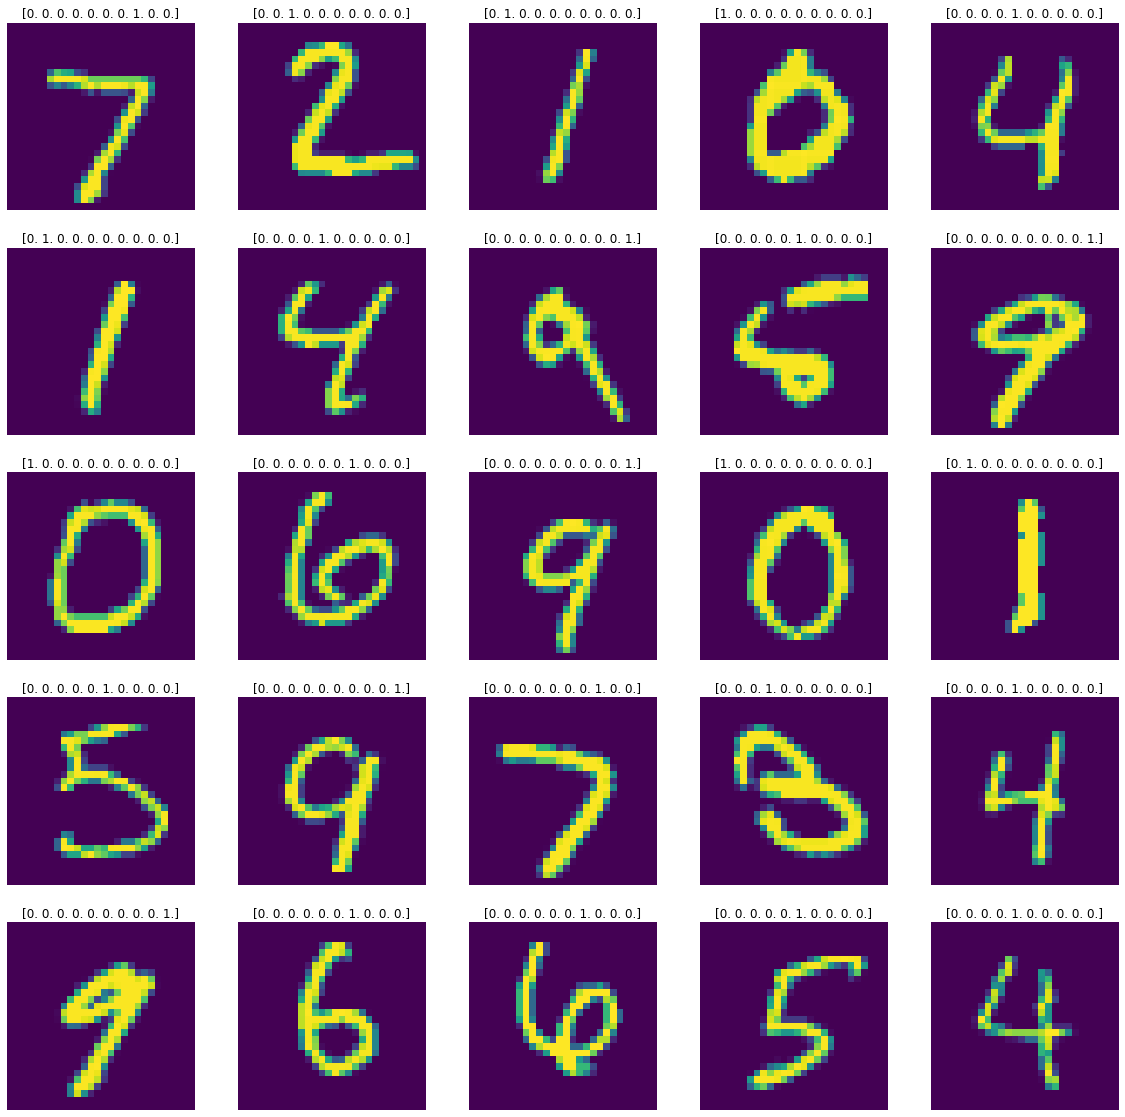

In [104]:
plt.figure(figsize=(20,20))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.title(predictions[i].round())
    plt.axis("off")

# Summary of the code

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])